<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импорт библиотек

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11, 7

In [ ]:
param = r'/content/drive/My Drive/Нетология/PY_Статистика/дз/ДЗ_4/'

file = 'water.csv'

df_water= pd.read_csv(f'{param}{file}', sep = ',', index_col='Unnamed: 0')

df_water.head(7)

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10
7,North,Bootle,1807,15


In [ ]:
# Изучим данные:
# 1) общая информация по всему Датафрейму
df_water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


In [ ]:
df_water.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [ ]:
# 2) наименования по категориальным столбцам

for column in df_water[[ 'location', 'town']]:
  print(f"{column}: {df_water[column].unique()}")

location: ['South' 'North']
town: ['Bath' 'Birkenhead' 'Birmingham' 'Blackburn' 'Blackpool' 'Bolton'
 'Bootle' 'Bournemouth' 'Bradford' 'Brighton' 'Bristol' 'Burnley'
 'Cardiff' 'Coventry' 'Croydon' 'Darlington' 'Derby' 'Doncaster'
 'East Ham' 'Exeter' 'Gateshead' 'Grimsby' 'Halifax' 'Huddersfield' 'Hull'
 'Ipswich' 'Leeds' 'Leicester' 'Liverpool' 'Manchester' 'Middlesbrough'
 'Newcastle' 'Newport' 'Northampton' 'Norwich' 'Nottingham' 'Oldham'
 'Oxford' 'Plymouth' 'Portsmouth' 'Preston' 'Reading' 'Rochdale'
 'Rotherham' 'St Helens' 'Salford' 'Sheffield' 'Southampton' 'Southend'
 'Southport' 'South Shields' 'Stockport' 'Stoke' 'Sunderland' 'Swansea'
 'Wallasey' 'Walsall' 'West Bromwich' 'West Ham' 'Wolverhampton' 'York']


# Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

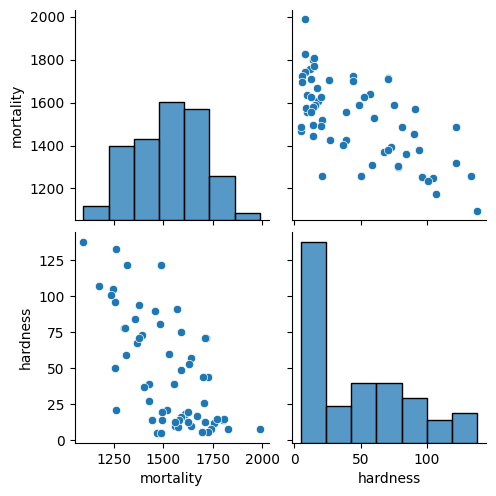

In [ ]:
# Определим как связаны между собой признаки
sns.pairplot(df_water)

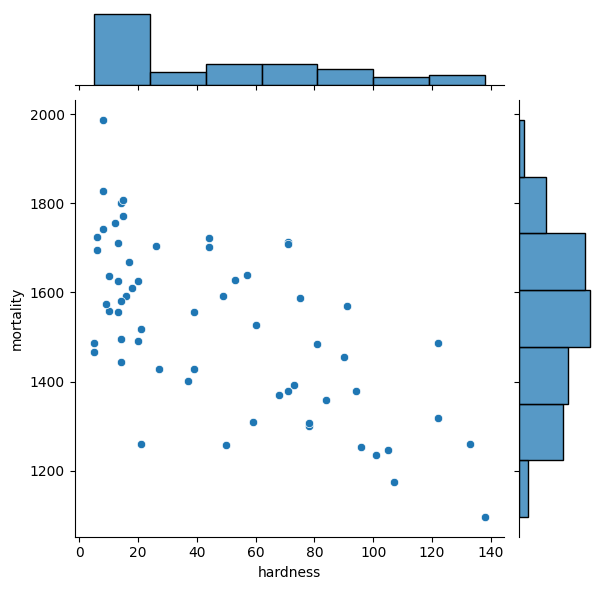

In [ ]:
sns.jointplot(x='hardness', y ='mortality', data=df_water)

Взаимосвязь между параметрами "смертность" и "концентрация кальция в питьевой воде" - средняя отрицательная, без ярко выраженных выбросов. Параметр "смертность" имеет около нормальное распределение, "концентрация кальция в воде" – логарифмическое.

In [ ]:
# Коэффициенты корреляции:
# 1. Пирсона
df_water[['mortality', 'hardness']]. corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
# 2. Спирмана
df_water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
# 3. Кенделла
df_water[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [ ]:
# Построим модель линейной регрессии, и определим как зависит смертность от качества воды

X = df_water['hardness']
y = df_water['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)

In [ ]:
# коэфф модели

lm = LinearRegression()
lm.fit(X_train, y_train)

print(f'коэфф a = {lm.coef_[0]}')
print(f'коэфф b = {lm.intercept_}')

коэфф a = -2.1759961223931796
коэфф b = 1631.632381331146


In [ ]:
# значение полученные с помощью модели:

y_pred = lm.predict(X_test)
print(f' y_pred = {y_pred}')

 y_pred = [1603.34443174 1342.22489705 1618.5764046  1618.5764046  1522.83257521
 1427.08874583 1461.90468378 1603.34443174 1601.16843562 1588.11245888
 1601.16843562 1435.79273032 1461.90468378 1585.93646276 1585.93646276
 1594.64044725 1535.88855195 1605.52042786 1575.05648215 1422.73675358
 1483.66464501 1477.13665664 1535.88855195 1572.88048603 1546.76853256
 1411.85677297 1468.43267215 1609.87242011 1331.34491644 1477.13665664
 1598.9924395  1614.22441235 1366.1608544  1366.1608544  1525.00857133
 1598.9924395  1588.11245888 1516.30458684 1455.37669542 1448.84870705
 1551.1205248  1501.07261399 1601.16843562 1614.22441235 1398.80079624
 1620.75240072]


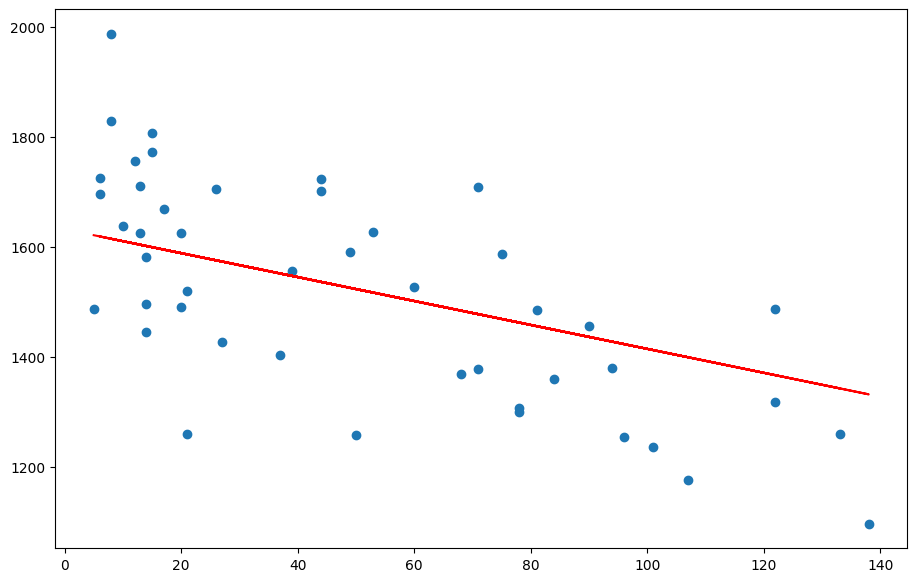

In [ ]:
#  изобразим на графике модель линейной регрессии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# Рассчитаем ошибки для полученой модели

print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.40914266354685824
MAE: 127.2487208832759
MSE: 22690.79258187731
RMSE: 150.6346327438591


<Axes: xlabel='mortality', ylabel='Count'>

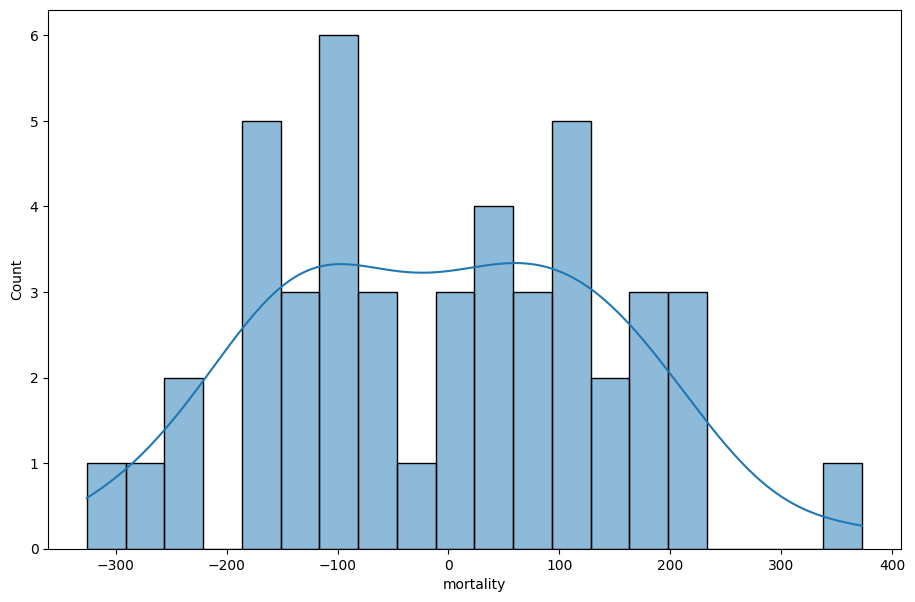

In [ ]:
# Анализ остатков

sns.histplot((y_test-y_pred), kde=True, bins=20)

Для нашей модели линейной регрессии коэфф. детерминации равен 0,39 - что говорит о низком качестве данной модели. Так же имеется большой разброс по остаткам: от -300 до 400. Для улучшения качества нашей модели линейной регрессии необходимо добавить количество наблюдений и/или других взаимосвязанных признаков.

#Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
#  разделим датафрем на 2 части - по регионам

df_south = df_water[df_water['location'] == 'South']

df_north = df_water[df_water['location'] == 'North']
df_north.head(7)

,location,town,mortality,hardness
2,North,Birkenhead,1668,17
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10
7,North,Bootle,1807,15
9,North,Bradford,1637,10
12,North,Burnley,1755,12


In [ ]:
#  Определим кол-во значений в каждой выборке

print(df_south['location'].value_counts())
print(df_north['location'].value_counts())

South    26
Name: location, dtype: int64
North    35
Name: location, dtype: int64


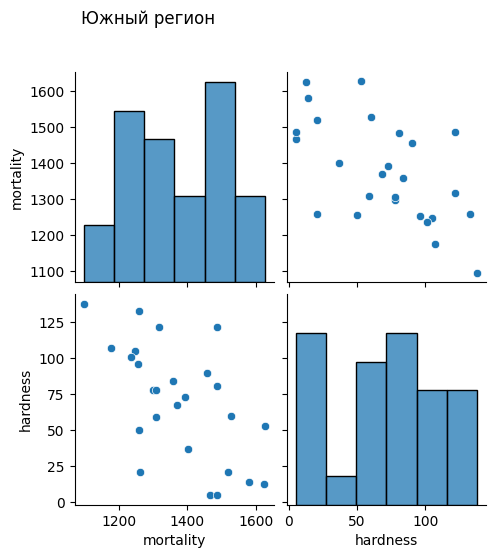

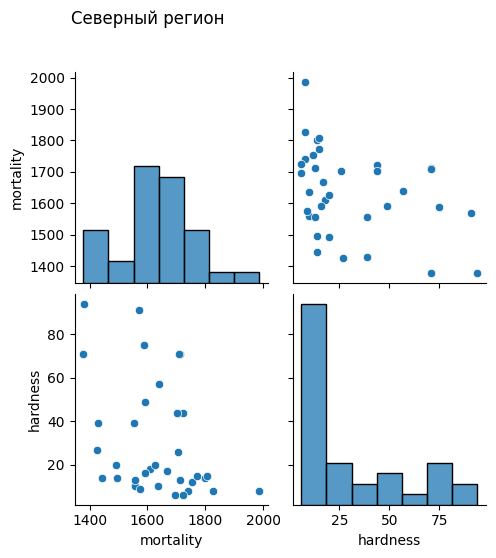

In [ ]:
# Определим как связаны между собой признаки

sns.pairplot(df_south)
plt.suptitle('Южный регион', x = 0.3, y = 1.1)
plt.show()

sns.pairplot(df_north)
plt.suptitle('Северный регион', x = 0.3, y = 1.1)
plt.show()

Южный регион: взаимосявзь между параметрами "смертность" и "концентрация кальция в питьевой воде" - средняя отрицательная.
Северный регион: взаимосявзь между параметрами - отрицательная, слабо выраженная.

In [ ]:
# Коэффициенты корреляции:
# 1. Пирсона
print('Южный регион')
df_south[['mortality', 'hardness']]. corr()

Южный регион


,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
print('Северный регион')
df_north[['mortality', 'hardness']]. corr()

Северный регион


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# 2. Спирмана
print('Южный регион')
df_south[['mortality', 'hardness']].corr(method='spearman')

Южный регион


,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [ ]:
print('Северный регион')
df_north[['mortality', 'hardness']].corr(method='spearman')

Северный регион


,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
# 3. Кенделла
print('Южный регион')
df_south[['mortality', 'hardness']].corr(method='kendall')

Южный регион


,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [ ]:
print('Северный регион')
df_south[['mortality', 'hardness']].corr(method='kendall')

Северный регион


,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [ ]:
# Построим модель линейной регрессии для каждой группы, и определим как зависит смертность от качества воды в отдельных регионах

# Южный регион
X_south = df_south[['hardness']]
y_south = df_south['mortality']
X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(X_south, y_south, train_size=0.2)

# Северный регион
X_north = df_north[['hardness']]
y_north = df_north['mortality']
X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(X_north, y_north, train_size=0.2)

In [ ]:
# коэфф модели

# Южный регион
lm_south = LinearRegression()
lm_south.fit(X_train_south, y_train_south)

print('Южный регион')
print(f'коэфф a = {lm_south.coef_[0]}')
print(f'коэфф b = {lm_south.intercept_}')

# Северный регион
lm_north = LinearRegression()
lm_north.fit(X_train_north, y_train_north)

print('\nСеверный регион')
print(f'коэфф a = {lm_north.coef_[0]}')
print(f'коэфф b = {lm_north.intercept_}')

Южный регион
коэфф a = -1.6583282923531286
коэфф b = 1485.4712664128383

Северный регион
коэфф a = -3.15804251905335
коэфф b = 1717.9530685920577


In [ ]:
# значение полцченные с помощью модели:

print('Южный регион')
y_pred_south = lm.predict(X_test_south)
print(f' y_pred = {y_pred_south}')

print('\nСеверный регион')
y_pred_north = lm.predict(X_test_north)
print(f' y_pred = {y_pred_north}')

Южный регион
 y_pred = [1585.93646276 1601.16843562 1551.1205248  1366.1608544  1620.75240072
 1585.93646276 1435.79273032 1411.85677297 1603.34443174 1403.15278848
 1516.30458684 1483.66464501 1422.73675358 1501.07261399 1455.37669542
 1398.80079624 1461.90468378 1448.84870705 1522.83257521 1342.22489705
 1461.90468378]

Северный регион
 y_pred = [1525.00857133 1614.22441235 1477.13665664 1598.9924395  1618.5764046
 1427.08874583 1603.34443174 1546.76853256 1535.88855195 1572.88048603
 1601.16843562 1575.05648215 1601.16843562 1612.04841623 1609.87242011
 1588.11245888 1609.87242011 1588.11245888 1614.22441235 1614.22441235
 1618.5764046  1433.61673419 1477.13665664 1592.46445113 1596.81644337
 1507.60060235 1594.64044725 1603.34443174]


Text(0.5, 1.0, 'Северный регион')

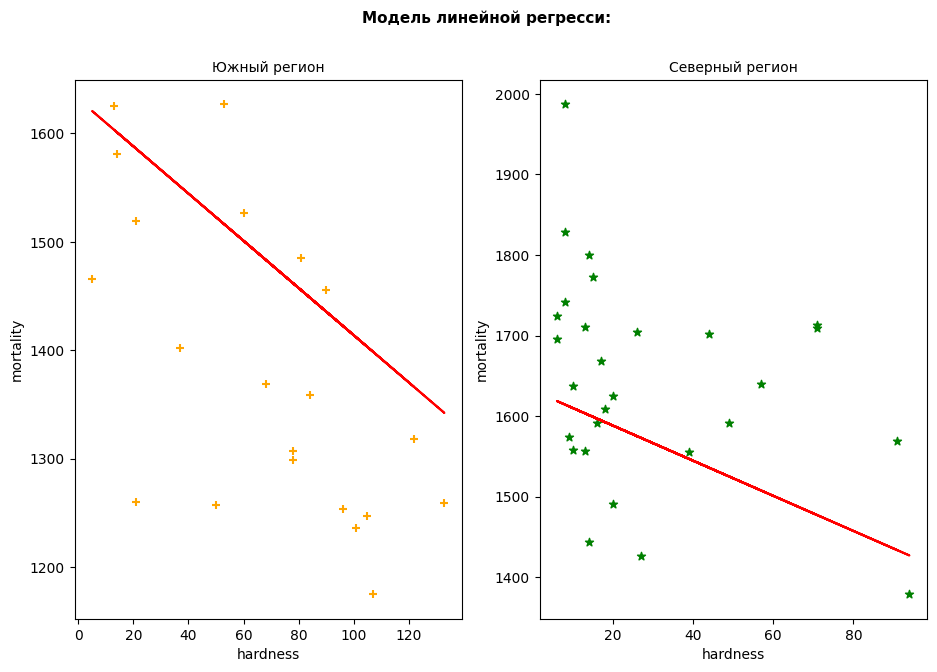

In [ ]:
#  изобразим на графике модель линейной регрессии для каждой группы:

plt.suptitle('Модель линейной регресси:', fontsize=11, fontweight='bold')

plt.subplot(1, 2, 1)
plt.scatter(X_test_south, y_test_south, color = 'orange', marker='+')
plt.plot(X_test_south, y_pred_south, color = 'red')
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Южный регион',fontsize=10)

plt.subplot(1, 2, 2)
plt.scatter(X_test_north, y_test_north, color = 'green',  marker='*')
plt.plot(X_test_north, y_pred_north, color = 'red')
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Северный регион',fontsize=10)


In [ ]:
# Рассчитаем ошибки для полученых моделей

print('Южный регион')
print(f'R2: {metrics.r2_score(y_test_south, y_pred_south)}')
print(f'MAE: {metrics.mean_absolute_error(y_test_south, y_pred_south)}')
print(f'MSE: {metrics.mean_squared_error(y_test_south, y_pred_south)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test_south, y_pred_south))}')

print('\nСеверный регион')
print(f'R2: {metrics.r2_score(y_test_north, y_pred_north)}')
print(f'MAE: {metrics.mean_absolute_error(y_test_north, y_pred_north)}')
print(f'MSE: {metrics.mean_squared_error(y_test_north, y_pred_north)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test_north, y_pred_north))}')


Южный регион
R2: -0.1923092257998429
MAE: 122.33863742442948
MSE: 21786.798821785756
RMSE: 147.6035190020406

Северный регион
R2: -0.24601042065979195
MAE: 115.20349712552863
MSE: 20172.951621555196
RMSE: 142.03151629675435


Text(0.5, 1.0, 'Северный регион')

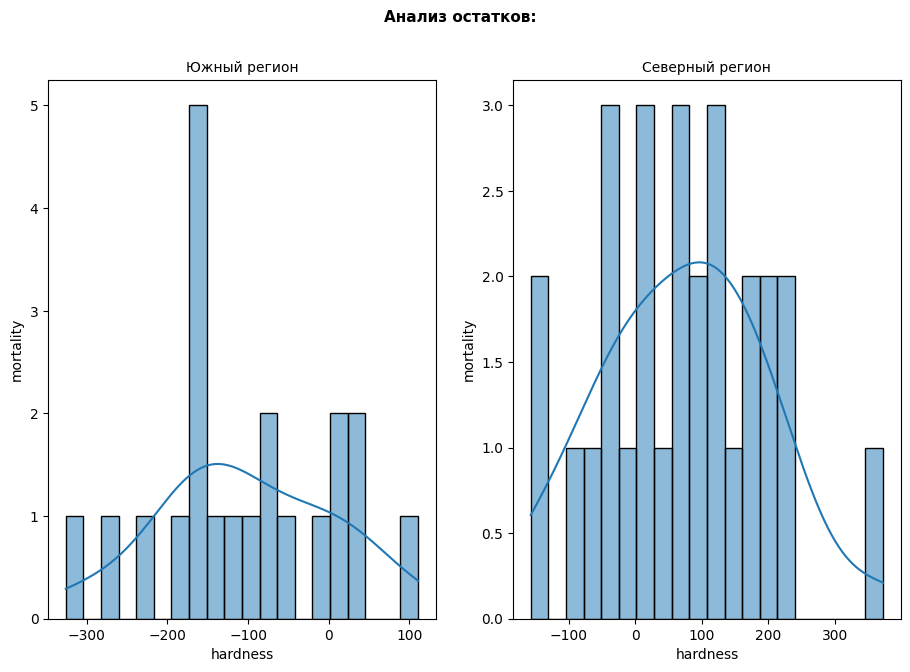

In [ ]:
# Анализ остатков
plt.suptitle('Анализ остатков:', fontsize=11, fontweight='bold')

plt.subplot(1, 2, 1)
sns.histplot((y_test_south-y_pred_south), kde=True, bins=20)
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Южный регион',fontsize=10)

plt.subplot(1, 2, 2)
sns.histplot((y_test_north-y_pred_north), kde=True, bins=20)
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Северный регион',fontsize=10)

Для каждой из модели линейной регрессии (Южный и Северный регион) коэфф. детерминации меньше нуля — это говорит об отсутствии линейной зависимости в рассматриваемых признаках.
Так же имеется большой и неравномерный разброс по остаткам:
  - Южный регион: от -300 до 100,
  - Северный регион: от -100 до 350.
  
Для улучшения качества нашей модели линейной регрессии необходимо добавить количество наблюдений и/или других взаимосвязанных признаков.
26 наблюдений для Южной группы и 35 наблюдений для Северной группы – является слишком маленьким количеством для построения качественной модели линейной регрессии.